In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
data = pd.read_csv('data/STEM_AdmissionCAT.csv')

data.head()

,Student ID,Openness Score,Conscientiousness Score,Waec_Count,Waec_Score,Waec_Percentile,Waec_English,Waec_Mathematics,Waec_Civic Education,Waec_Trade,...,J-Bio,J-Chem,J-Phy,J-Math,J-Geo,J-Econs,JAMB_COUNT,JAMB SCORE,program_entry_requirements,success_label
0,47,36,39,8,41,73.214286,7,4,4,4,...,NaN,66.0,NaN,76.0,67.0,NaN,4,276,1,0
1,260,25,25,9,49,77.777778,6,4,5,5,...,NaN,69.0,NaN,NaN,77.0,80.0,4,295,1,1
2,3,35,35,9,57,90.476190,6,7,6,7,...,NaN,71.0,65.0,83.0,NaN,NaN,4,282,1,0
3,51,26,41,9,49,77.777778,6,4,4,4,...,NaN,NaN,68.0,81.0,73.0,NaN,4,305,1,1
4,251,36,30,8,43,76.785714,5,7,5,4,...,62.0,NaN,75.0,NaN,63.0,NaN,4,275,1,1


In [3]:
data.fillna(0, inplace=True)

In [4]:
waec_grade_mapping = {
    'A1': 7, 'B2': 6, 'B3': 5, 'C4': 4, 'C5': 3, 'C6': 2,
    'D7': 1, 'E8': 1, 'F9': 1, 0: 0
}

In [5]:
waec_columns = [
    'Waec_English ','Waec_Trade','Waec_Civic Education','Waec_Mathematics', ' Waec_Physics', 'Waec_Chemistry ', 'Waec_Biology', 'Waec_Technical_Drawing', 'Waec_Further_Mathematics', 'Waec_Computer_Studies', 'Waec_Economics'
]

In [6]:
for col in waec_columns:
    data[col] = data[col].map(waec_grade_mapping)


In [7]:
data['Openness Score'] = data['Openness Score'] / 50
data['Conscientiousness Score'] = data['Conscientiousness Score'] / 45

C:\Users\elich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


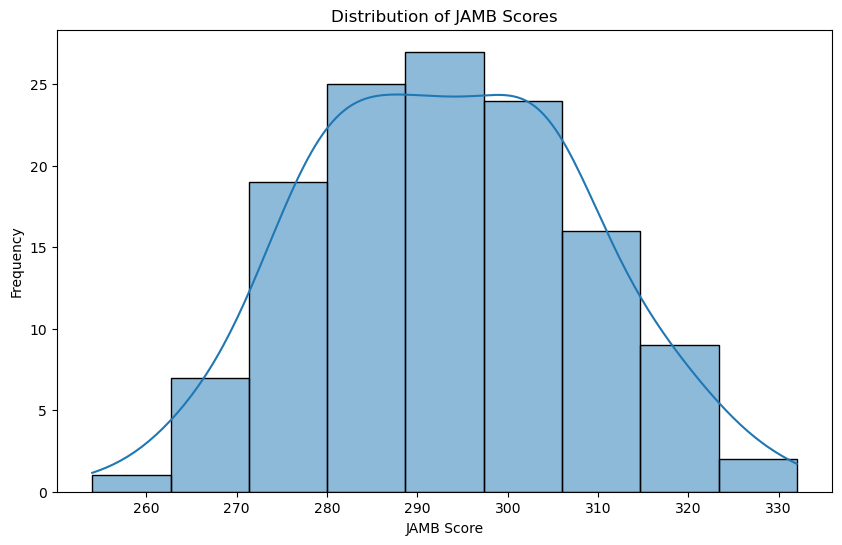

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['JAMB SCORE'], kde=True)
plt.title('Distribution of JAMB Scores')
plt.xlabel('JAMB Score')
plt.ylabel('Frequency')
plt.show()

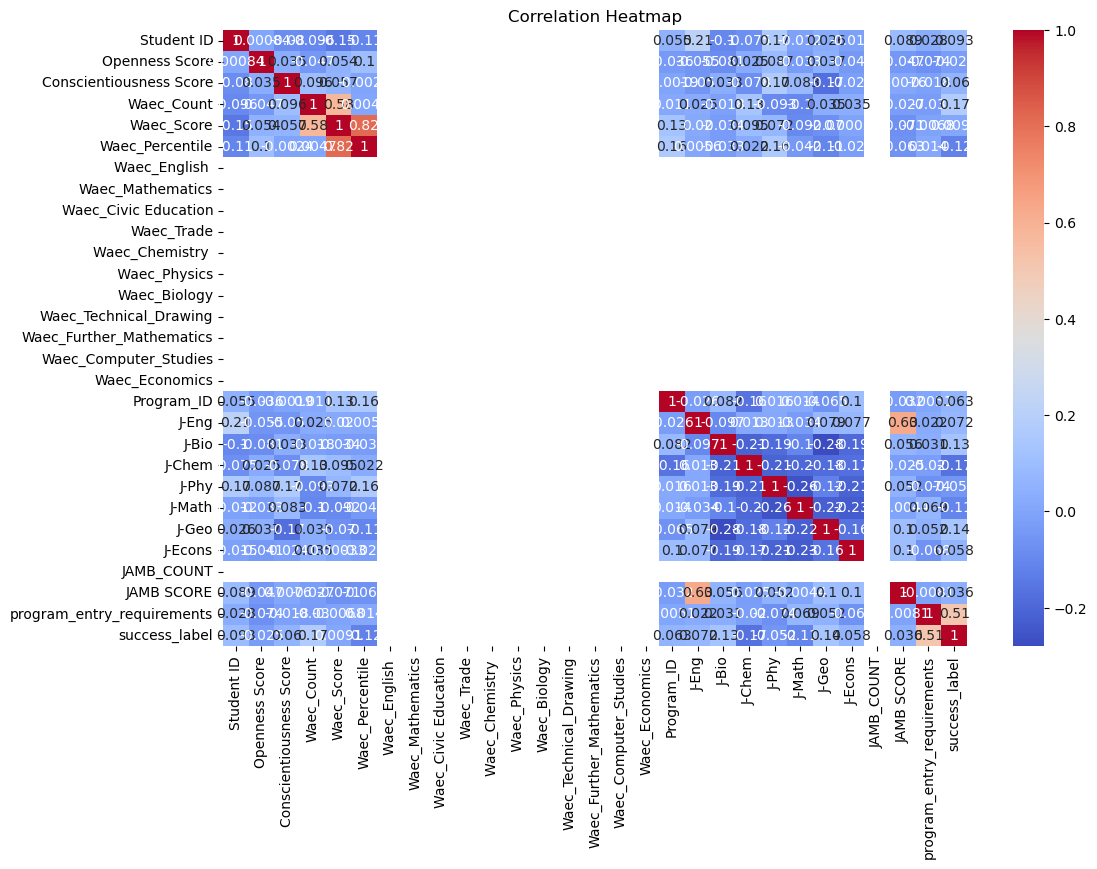

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
features = [
    'Openness Score', 'Conscientiousness Score',  'Waec_English ','Waec_Trade','Waec_Civic Education','Waec_Mathematics', ' Waec_Physics', 'Waec_Chemistry ', 'Waec_Biology', 'Waec_Technical_Drawing', 'Waec_Further_Mathematics', 'Waec_Computer_Studies', 'Waec_Economics',
'JAMB SCORE'
]

In [11]:
y = data['success_label']

In [12]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data[features], y, test_size=0.2, random_state=42)



In [14]:
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(random_state=42)

In [16]:
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)], 
    voting='soft'
)

In [17]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [18]:
joblib.dump(voting_clf, 'voting_classifier_model.pkl')

['voting_classifier_model.pkl']

In [19]:
y_pred = voting_clf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.42


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.08      0.12        12
           1       0.48      0.71      0.57        14

    accuracy                           0.42        26
   macro avg       0.34      0.40      0.34        26
weighted avg       0.35      0.42      0.36        26



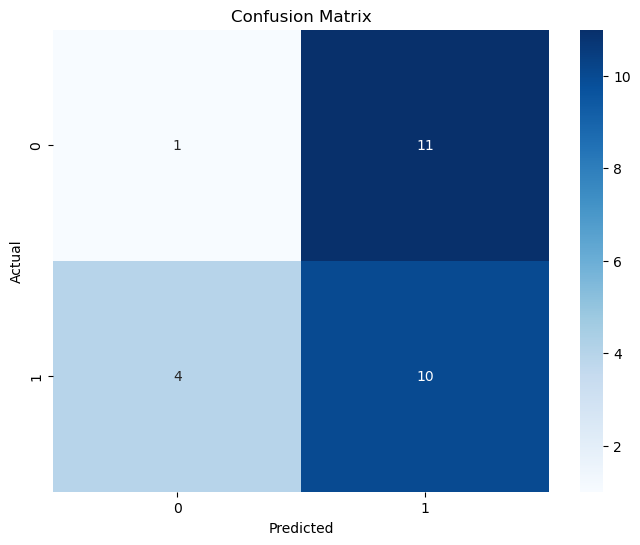

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()